In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the feature matrix csv file
featmat=pd.read_csv("/content/feamat.csv")

In [4]:
featmat.head()

V1      V2          V3     V4      V5   V6   V7   V8        V9  \
0     60-35-5     178   59.037114 -0.808   43.09  0.0  0.0  0.0  0.000000   
1    103-90-2    1983  151.063329  0.870   49.33  0.0  0.0  0.0  0.083333   
2    968-81-0    1989  324.114378  2.960  100.72  0.0  0.0  0.0  0.185395   
3    520-45-6  122903  168.042259 -0.551   60.44  0.0  0.0  0.0  0.055556   
4  50594-66-6   44073  360.996485  4.557   89.67  0.0  0.0  0.0  0.136083   

        V10  ...  V1066  V1067  V1068  V1069  V1070  V1071  V1072  V1073  \
0  0.000000  ...      0      0      0      0      0      0      0      0   
1  0.142259  ...      0      0      0      0      0      0      0      0   
2  0.161948  ...      0      0      0      0      0      0      0      0   
3  0.198742  ...      0      0      0      0      0      0      0      0   
4  0.276855  ...      0      0      0      0      0      0      0      0   

   V1074  V1075  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  

[5 rows x 1075 columns]

In [5]:
# excluding columns containing 0's, 1's
featmat= featmat.loc[:, (~featmat.isin([0])).any(axis=0)]
featmat= featmat.loc[:, (~featmat.isin([1])).any(axis=0)]


In [6]:
#treating infinity values and replacing them with the mean of the column
featmat.replace([np.inf, -np.inf], np.nan, inplace=True)
featmat['V15'].fillna(value=featmat['V15'].mean(), inplace=True)
featmat.shape

(8831, 946)

In [7]:
# loading the train and test csv file
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [8]:
# splitting test and train 'Id' column into 'Id' and 'Assay'
train[['Id','Assay']] = train['Id'].str.split(';',expand=True)
test[['Id','Assay']] = test['x'].str.split(';',expand=True)

In [9]:
# Merging test and train dataset with featmat based on 'Id' column
train = train.merge(featmat, left_on='Id', right_on='V1', how='left')
test = test.merge(featmat, left_on='Id', right_on='V1', how='left')

In [10]:
train.shape, test.shape

((77413, 949), (11139, 949))

<Axes: xlabel='Expected', ylabel='count'>

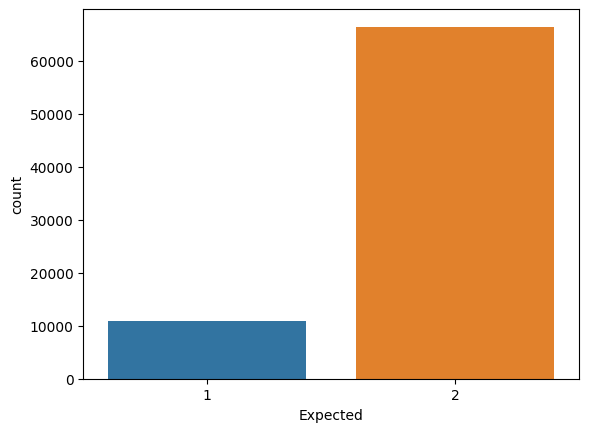

In [11]:
import seaborn as sns
sns.countplot(data=train, x="Expected")

In [12]:
#changing the datatype of 'Assay' to integer
train['Assay'] = train.Assay.astype(int)
test['Assay'] = test.Assay.astype(int)

In [13]:
#Dropping v1 and v2 column from train and test
train.drop(columns=['V1','V2'],inplace=True)
test.drop(columns=['V1', 'V2'],inplace=True)

In [14]:
#loading the features and target variables
x= train.drop(["Id","Expected"], axis=1)
y= train['Expected']

In [15]:
target= test.drop(["x","Id"], axis=1)

In [16]:
x.shape, target.shape

((77413, 945), (11139, 945))

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [19]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier
    models[key].fit(x_train, y_train)

    # Make predictions
    predictions = models[key].predict(x_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Logistic Regression      0.174641   0.932388  0.139759
Support Vector Machines  0.825204   0.074155  0.196154
Decision Trees           0.869691   0.547801  0.541113
Random Forest            0.830629   0.379862  0.399312
Naive Bayes              0.840085   0.030171  0.162745
K-Nearest Neighbor       0.858479   0.333697  0.503289